# **Fake News Classifier**

Dataset: https://www.kaggle.com/c/fake-news/data

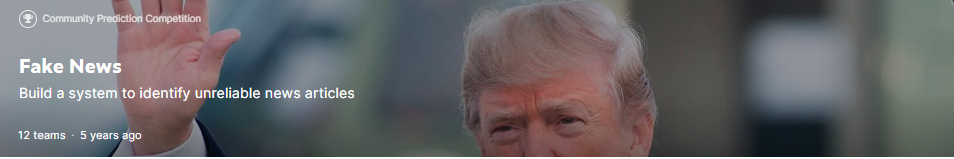

**Dataset Description**

train.csv: A full training dataset with the following attributes:

id: unique id for a news article

title: the title of a news article

author: author of the news article

text: the text of the article; could be incomplete

label: a label that marks the article as potentially 
unreliable


*   1: unreliable
*   0: reliable

test.csv: A testing training dataset with all the same attributes at train.csv without the label.

submit.csv: A sample submission that you can

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd

In [3]:
#Data we have received is Zip format so, we have unzip the Dataset

import zipfile
import io
zf = zipfile.ZipFile("/content/train.csv.zip", "r")
zf.extractall("/content")
zf.close()

In [4]:
df = pd.read_csv("/content/train.csv")

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df.shape

(20800, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
# Missing Values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
# Simply drop the Missing values
df = df.dropna()

In [10]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [11]:
# Independent Features

X = df.drop(columns = ["label"],axis=1)

In [12]:
X 

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [13]:
# Dependent Feature (Targer Variable)

y = df["label"]

In [14]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [15]:
X.shape

(18285, 4)

In [16]:
# Import required Libraries
import tensorflow as tf
from tensorflow import keras

#Modle
from tensorflow.keras.models import Sequential 

#Layers
from tensorflow.keras.layers import Embedding 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

#from temsorflow.keras.layers import Bidirectional 

#Pre-process
''' Pad_Sequence:- Whenever we are giving Input to our Lstm NN we have to make sure our Input length -> "Text". 
We make the sentence Equal in lenght(from Pre or Post) 
'''
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.preprocessing.text import one_hot # For One-Hot Representation


In [17]:
print(tf.__version__)

2.11.0


Vol_size:- Just consider that you have Dictionary of 10000 words with those many words you will be getting all the sentences

In [18]:
# Define Vocabulary size

voc_size = 5000 # we can all cange this voc_size value like 10,000 also

### **One-Hot Representation**

In [19]:
messages = X.copy()

In [20]:
messages["title"]

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799                            What Keeps the F-35 Alive
Name: title, Length: 18285, dtype: object

In [21]:
messages.reset_index(inplace = True) # reson behind reset index is i have drop Nan values

In [22]:
# import reuired nltk libraries
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [24]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()
corpus = []

In [25]:
for i in range(0, len(messages)):
  print(i)
  review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
  review = review.lower()
  review = review.split()
    
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

Streaming output truncated to the last 5000 lines.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
1

In [26]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

One_Hot Representation

In [27]:
## one_hot representation
onehot_rep = [one_hot(words,voc_size) for words in corpus]
onehot_rep 

[[730, 1512, 845, 2424, 2334, 3979, 4279, 3096, 3807, 4467],
 [3467, 3458, 3378, 507, 2554, 1121, 4239],
 [4917, 1916, 4723, 3509],
 [2402, 2721, 3285, 1927, 863, 1326],
 [1464, 2554, 4792, 4532, 4643, 1560, 2554, 2555, 3886, 2342],
 [4708,
  1473,
  1727,
  920,
  4792,
  4169,
  3552,
  2718,
  297,
  4032,
  465,
  3707,
  71,
  1958,
  4239],
 [2646, 724, 3982, 114, 4404, 3722, 2467, 1718, 4839, 1204, 378],
 [1604, 3373, 2775, 1046, 1172, 473, 4169, 3550, 4839, 1204, 378],
 [4194, 4662, 4727, 4461, 631, 3479, 799, 513, 4169, 1404],
 [3526, 567, 2878, 659, 4490, 2472, 4947, 3670],
 [4826, 3685, 2703, 3411, 3089, 2653, 2511, 3746, 1432, 1025, 1567],
 [1927, 4065, 2334, 3479, 4169, 1172],
 [1014, 837, 2292, 296, 3623, 3334, 2113, 3871, 1434],
 [2479, 807, 4821, 3941, 717, 4421, 1253, 4839, 1204, 378],
 [4956, 302, 4483, 1377, 4189, 4839, 1204, 378],
 [4084, 726, 587, 3347, 3242, 1156, 2449, 3593, 2344, 1717],
 [3823, 2569, 3458],
 [1833, 2591, 4524, 4435, 4169, 596, 98, 4239],
 [4470,

"""
one-hot = []
for words in corpus:
  c = one_hot(words,voc_size)
  one-hot.append(c)
"""

### **Embedding Representation**

##### **Note:**

All the sentence length are different, to fix the length we are using Padding(pad_sequences)

---

Pre:- Making all the Sentences length equal (at the beining of the sntences adding "0")

In [30]:
sent_length = 20
embedded_docs = pad_sequences(onehot_rep,padding = "pre",maxlen = sent_length)
print(embedded_docs)

[[   0    0    0 ... 3096 3807 4467]
 [   0    0    0 ... 2554 1121 4239]
 [   0    0    0 ... 1916 4723 3509]
 ...
 [   0    0    0 ... 4839 1204  378]
 [   0    0    0 ... 2681   46 1462]
 [   0    0    0 ... 4254  449 3938]]


In [31]:
len(embedded_docs)

18285

In [32]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  730,
       1512,  845, 2424, 2334, 3979, 4279, 3096, 3807, 4467], dtype=int32)

**Creating the Model**

**Explanation:-**


1. **emdedding_vector_feature**: How many vector features i want, In Embedding Layer it takes the Input and Convert features into some specific vectors

2. LSTM(100) -> Here i am taking 1 LSTM which has 100 Neurons

In [33]:
emdedding_vector_feature = 40

#creting the Model
model = Sequential()

model.add(Embedding(voc_size,emdedding_vector_feature,input_length = sent_length))
#model.add(Dropout(0.3))
model.add(LSTM(100))
#model.add(Dropout(0.3))
model.add(Dense(1,activation = "sigmoid"))

In [42]:
model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [44]:
len(embedded_docs),y.shape

(18285, (18285,))

In [69]:
#import Numpy

import numpy as np

X_final = np.array(embedded_docs)
y_final = np.array(y)

In [70]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

Split the Dataset

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size = 0.30,random_state = 42)

In [72]:
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of X_train : (12799, 20)
Shape of X_test : (5486, 20)
Shape of y_train : (12799,)
Shape of y_test : (5486,)


**Model Training**

In [73]:
model_history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 5,batch_size = 64)

Epoch 1/5
200/200 [==============================] - 2s 8ms/step - loss: 7.7329e-04 - accuracy: 0.9999 - val_loss: 0.7021 - val_accuracy: 0.9116
Epoch 2/5
200/200 [==============================] - 2s 9ms/step - loss: 5.5221e-04 - accuracy: 0.9999 - val_loss: 0.6995 - val_accuracy: 0.9120
Epoch 3/5
200/200 [==============================] - 2s 8ms/step - loss: 3.6616e-04 - accuracy: 0.9999 - val_loss: 0.7730 - val_accuracy: 0.9107
Epoch 4/5
200/200 [==============================] - 2s 8ms/step - loss: 7.9483e-05 - accuracy: 1.0000 - val_loss: 0.7940 - val_accuracy: 0.9094
Epoch 5/5
200/200 [==============================] - 2s 8ms/step - loss: 4.0692e-05 - accuracy: 1.0000 - val_loss: 0.8180 - val_accuracy: 0.9100


In [74]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Performance of the Metrics and accuracy**

In [79]:
# Making the predictions and evaluating the model

# Predicting for the Test Data set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

172/172 [==============================] - 1s 3ms/step


In [80]:
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [81]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [82]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [83]:
score

0.909952606635071

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3107
           1       0.89      0.91      0.90      2379

    accuracy                           0.91      5486
   macro avg       0.91      0.91      0.91      5486
weighted avg       0.91      0.91      0.91      5486



**References:-** 

1. https://www.youtube.com/watch?v=MXPh_lMRwAI&list=PLZoTAELRMXVPGU70ZGsckrMdr0FteeRUi&index=45